# NHANES Hybrid approach of 3 Random Forest and 2 ANN models passed into an ANN model.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set directory path
import os
os.chdir("/content/drive/My Drive/COMP-5800-YDK-2020_Group1")

## Importing libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
import keras
import tensorflow as tf
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import RandomizedSearchCV

In [5]:
demoData = pd.read_csv('ImputedDataset/DemographicsData.csv')
dietData = pd.read_csv('ImputedDataset/DietaryData.csv')
examData = pd.read_csv('ImputedDataset/ExaminationData.csv')
labData = pd.read_csv('ImputedDataset/LaboratoryData.csv')
hypertensionData = pd.read_csv('ImputedDataset/HypertensionData.csv')

In [6]:
demoData.shape

(8366, 30)

In [7]:
dietData.shape

(8366, 44)

In [8]:
examData.shape

(8366, 138)

In [9]:
labData.shape

(8366, 190)

In [10]:
hypertensionData.shape

(8366, 666)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [12]:
y = hypertensionData['Target']

## Train Test Split with Stratified Sampling

In [13]:
demoX_train, demoX_test, demoY_train, demoY_test = train_test_split(demoData, y, test_size=0.33, random_state=42, stratify = y)

In [14]:
demoX_train

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2
6088,100419.0,10.0,2.0,1.0,40.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,3.0,2.0,3.0,24997.641011,25622.623257,1.0,140.0,2.0,2.0
3690,97776.0,10.0,2.0,2.0,58.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,7.0,3.000000e+00,1.000000e+00,5.397605e-79,2.0,3.0,1.0,1.0,14251.694988,13772.628441,2.0,134.0,99.0,99.0
6316,100676.0,10.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,4.0,1.000000e+00,1.000000e+00,5.397605e-79,2.0,2.0,2.0,1.0,10436.246384,11791.198224,2.0,139.0,8.0,8.0
4537,98714.0,10.0,2.0,2.0,40.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,4.0,5.397605e-79,1.000000e+00,5.397605e-79,2.0,3.0,2.0,1.0,49651.298235,54699.700414,1.0,135.0,14.0,14.0
8174,102746.0,10.0,2.0,1.0,23.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,3.0,2.4,1.0,157205.909952,179271.499191,2.0,143.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,96901.0,10.0,2.0,2.0,33.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,1.000000e+00,2.000000e+00,5.397605e-79,2.0,2.0,1.0,1.0,15949.784036,17898.812845,2.0,140.0,6.0,6.0
212,93930.0,10.0,2.0,1.0,80.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.2,2.0,2.0,3.0,3.0,5.397605e-79,5.397605e-79,2.000000e+00,2.0,3.0,2.0,1.6,12491.034237,13745.249277,2.0,141.0,10.2,10.2
4909,99123.0,10.0,2.0,1.0,29.0,5.0,6.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,5.397605e-79,1.000000e+00,1.000000e+00,1.0,4.0,3.0,1.0,20498.081057,21459.835314,2.0,138.0,8.0,8.0
8071,102633.0,10.0,2.0,2.0,41.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,5.397605e-79,2.000000e+00,5.397605e-79,2.0,3.0,1.0,2.0,15488.672345,14923.931929,2.0,138.0,13.0,13.0


In [15]:
dietX_train, dietX_test, dietY_train, dietY_test = train_test_split(dietData, y, test_size=0.33, random_state=42, stratify = y)

In [16]:
dietX_train

,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQ128A,DSQ128B,DSQ128C,DSQ128D,DSQ128E,DSQ128F,DSQ128G,DSQ128H,DSQ128I,DSQ128J,DSQ128K,DSQ128L,DSQ128M,DSQ128N,DSQ128O,DSQ128P,DSQ128Q,DSQ128R,DSD128T,DSD128V,DSD128W,DSD128X,DSD128Z,DSD128AA,DSD128BB,DSD128DD,DSD128EE,DSD128FF,DSD128GG,DSD128HH,DSD128II,DSD128JJ,DSD128KK,DSD128LL,DSD128MM,DSQ128NN,DSD128OO,DSD128PP,DSQ128S
6088,100419.0,2.000000e+00,5.397605e-79,1.0,2.0,0.0,0.0,12.0,13.0,14.0,0.0,16.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3690,97776.0,1.000000e+00,5.397605e-79,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6316,100676.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4537,98714.0,1.000000e+00,5.397605e-79,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8174,102746.0,5.397605e-79,1.000000e+00,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,96901.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,93930.0,2.000000e+00,5.397605e-79,1.0,2.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4909,99123.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8071,102633.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
examX_train, examX_test, examY_train, examY_test = train_test_split(examData, y, test_size=0.33, random_state=42, stratify = y)

In [18]:
examX_train

,SEQN,BPXCHR,BPXPULS,BMDSTATS,BMXWT,OHDEXSTS,OHDRCSTS,OHDDESTS,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,OHX12CTC,OHX13CTC,OHX14CTC,OHX15CTC,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,OHX02CSC,OHX03CSC,OHX04CSC,OHX05CSC,...,OHX08RSC,OHX09RSC,OHX10RSC,OHX11RSC,OHX12RSC,OHX13RSC,OHX14RSC,OHX15RSC,OHX18RSC,OHX19RSC,OHX20RSC,OHX21RSC,OHX22RSC,OHX23RSC,OHX24RSC,OHX25RSC,OHX26RSC,OHX27RSC,OHX28RSC,OHX29RSC,OHX30RSC,OHX31RSC,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE
6088,100419.0,76.0,1.0,1.0,114.6,1.0,1.0,1.0,8,3,11,11,11,11,11,11,11,11,11,11,2,8,8,2,11,11,11,11,11,10,11,11,11,11,9,8,0,29,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3690,97776.0,70.0,1.0,1.0,74.1,1.0,1.0,1.0,5,6,8,8,8,8,8,8,8,8,8,8,6,5,8,3,4,11,11,11,11,10,11,11,11,11,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6316,100676.0,122.0,1.0,1.0,13.1,1.0,1.0,1.0,9,10,2,2,2,2,2,2,2,2,2,2,10,9,9,11,2,2,2,2,2,2,2,2,2,2,10,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4537,98714.0,78.0,1.0,3.0,110.3,1.0,1.0,1.0,2,2,4,4,11,11,11,11,11,11,11,11,9,8,2,2,4,11,11,11,11,10,11,11,11,11,3,2,36,0,34,28,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8174,102746.0,80.0,1.0,1.0,63.0,1.0,1.0,1.0,8,9,11,11,11,11,11,11,11,11,11,11,9,8,8,9,11,11,11,11,11,10,11,11,11,11,9,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,96901.0,60.0,1.0,1.0,64.1,1.0,1.0,1.0,8,9,11,11,11,11,11,11,11,11,11,11,9,8,8,14,11,11,11,11,11,10,11,11,11,11,9,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
212,93930.0,82.0,1.0,1.0,84.1,1.0,1.0,1.0,1,3,3,3,11,11,11,11,11,11,3,3,2,8,2,2,3,11,11,11,11,10,11,11,11,3,2,2,0,60,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4909,99123.0,62.0,1.0,1.0,43.7,1.0,1.0,1.0,8,9,11,7,11,11,11,11,11,11,7,11,9,8,8,9,11,11,11,7,11,10,7,11,11,11,9,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8071,102633.0,66.0,1.0,1.0,92.0,1.0,1.0,1.0,2,3,4,11,11,11,11,11,11,11,4,4,3,8,1,3,4,11,11,11,11,10,11,11,11,4,3,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
labX_train, labX_test, labY_train, labY_test = train_test_split(labData, y, test_size=0.33, random_state=42, stratify = y)

In [20]:
labX_train

,SEQN,URXUMA,URXUMS,URDUMALC,URXUCR,URXCRS,URDUCRLC,URDACT,LBDHDD,LBDHDDSI,LBXTC,LBDTCSI,LBXBCR,LBDBCRSI,LBDBCRLC,LBXBCO,LBDBCOSI,LBDBCOLC,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXCOT,...,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBDSGTLC,LBXSIR,LBDSIRSI,LBXSLDSI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSKSI,LBXSNASI,LBXSTB,LBDSTBSI,LBDSTBLC,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDFLOW3,URDTIME3,URXPREG,LBXVIC,LBDVICSI,LBDVICLC
6088,100419.0,84.80,84.80,5.397605e-79,252.0,22276.80,5.397605e-79,33.650,48.0,1.240,202.0,5.220,0.290,5.580,1.0,0.110,1.870,5.397605e-79,9.00,22.30,7.10,67.10,3.00,0.70,2.00,0.60,6.00,0.30,1.000000e-01,5.02,15.70,46.40,92.60,31.2,33.80,14.20,269.0,7.4,5.397605e-79,0.0270,...,3.20,32.0,88.0,4.880,59.0,5.397605e-79,75.0,13.40,92.0,289.0,3.50,1.1300,4.20,144.0,0.30,5.130,5.397605e-79,9.50,2.375,198.0,5.1200,7.40,74.0,125.0,1.4110,6.90,410.40,54.0,0.3578,273.4,105.0,0.7610,138.0,36.6,0.4354,75.0,2.4,0.2210,12.50,5.397605e-79
3690,97776.0,3.10,3.10,5.397605e-79,37.0,3270.80,5.397605e-79,8.380,60.0,1.550,205.0,5.300,0.290,5.580,1.0,0.180,3.050,5.397605e-79,6.30,35.50,8.10,55.10,1.10,0.30,2.20,0.50,3.50,0.10,5.397605e-79,4.39,12.80,37.90,86.50,29.1,33.60,14.80,233.0,8.7,5.397605e-79,0.0110,...,3.40,34.0,87.0,4.830,27.0,5.397605e-79,63.0,11.30,175.0,287.0,3.30,1.0660,4.10,144.0,0.20,3.420,5.397605e-79,9.80,2.450,205.0,5.3010,7.50,75.0,209.0,2.3600,5.50,327.10,99.0,1.0568,151.0,224.0,1.9496,113.0,295.8,4.3524,71.2,1.8,0.6610,37.50,5.397605e-79
6316,100676.0,13.82,13.82,5.397605e-79,87.6,7743.84,5.397605e-79,18.384,57.4,1.484,183.8,4.754,0.340,6.540,0.8,0.214,3.630,5.397605e-79,6.30,58.20,10.90,26.50,4.00,0.60,3.70,0.70,1.70,0.30,5.397605e-79,4.93,12.10,36.20,73.40,24.5,33.50,17.60,424.0,7.2,5.397605e-79,0.2424,...,3.34,33.4,100.6,5.584,22.6,5.397605e-79,68.2,12.22,149.4,280.8,3.64,1.1752,4.06,140.0,0.28,4.788,5.397605e-79,9.26,2.315,176.2,4.5564,7.22,72.2,143.2,1.6166,4.94,293.84,65.4,0.3904,241.6,35.8,0.5670,74.2,202.4,3.0264,69.4,2.0,1.3488,76.58,5.397605e-79
4537,98714.0,9.90,9.90,5.397605e-79,99.0,8751.60,5.397605e-79,10.000,66.0,1.710,215.0,5.560,0.290,5.580,1.0,0.150,2.550,5.397605e-79,6.50,39.20,7.70,51.60,1.00,0.70,2.50,0.50,3.40,0.10,5.397605e-79,4.26,13.00,39.10,91.80,30.5,33.20,13.10,279.0,8.1,1.000000e-01,0.0360,...,3.00,30.0,91.0,5.050,24.0,5.397605e-79,121.0,21.70,124.0,271.0,3.30,1.0660,4.00,136.0,0.40,6.840,5.397605e-79,8.70,2.175,211.0,5.4560,6.50,65.0,122.0,1.3770,4.20,249.80,22.0,0.7860,28.0,107.0,0.9874,111.2,157.4,2.6640,69.4,2.0,1.1800,67.00,5.397605e-79
8174,102746.0,6.70,6.70,5.397605e-79,165.0,14586.00,5.397605e-79,4.060,57.0,1.470,148.0,3.830,0.542,10.426,0.6,0.138,2.344,5.397605e-79,7.50,41.00,7.60,47.80,2.70,1.00,3.10,0.60,3.60,0.20,1.000000e-01,4.30,13.60,111.00,91.40,31.7,34.70,12.60,223.0,8.8,5.397605e-79,231.0000,...,2.60,26.0,81.0,4.500,11.0,5.397605e-79,88.0,15.80,124.0,286.0,4.50,1.4530,3.80,144.0,0.30,5.130,5.397605e-79,9.30,2.325,149.0,3.8530,6.40,64.0,123.0,1.3890,4.90,291.50,118.0,0.7280,162.0,64.2,0.6952,98.8,142.6,2.6810,59.6,2.0,0.3700,21.00,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,96901.0,1.40,1.40,5.397605e-79,22.0,1944.80,5.397605e-79,6.360,60.0,1.550,168.0,4.340,0.290,5.580,1.0,0.194,3.292,5.397605e-79,5.90,41.70,7.30,47.90,2.50,0.80,2.50,0.40,2.80,0.10,5.397605e-79,4.26,13.10,38.20,89.80,30.8,34.30,13.80,269.0,7.1,5.397605e-79,0.0400,...,2.40,24.0,80.0,4.440,12.0,5.397605e-79,89.0,15.90,106.0,284.0,3.80,1.2270,4.30,143.0,0.80,13.680,5.397605e-79

In [21]:
medX_train, medX_test, Y_train, Y_test = train_test_split(hypertensionData.drop('Target', axis=1), y, 
                                                          test_size=0.33, random_state=42, stratify = y)

In [22]:
medX_train

,SEQN,RXQSEEN,RXDDAYS,DRUG_ABACAVIR; DOLUTEGRAVIR; LAMIVUDINE,DRUG_ABACAVIR; LAMIVUDINE,DRUG_ABATACEPT,DRUG_ACARBOSE,DRUG_ACEBUTOLOL,DRUG_ACETAMINOPHEN; BUTALBITAL,DRUG_ACETAMINOPHEN; BUTALBITAL; CAFFEINE,DRUG_ACETAMINOPHEN; CODEINE,DRUG_ACETAMINOPHEN; HYDROCODONE,DRUG_ACETAMINOPHEN; OXYCODONE,DRUG_ACETAMINOPHEN; TRAMADOL,DRUG_ACETAZOLAMIDE,DRUG_ACETYLCYSTEINE,DRUG_ACYCLOVIR,DRUG_ADALIMUMAB,DRUG_ADAPALENE; BENZOYL PEROXIDE TOPICAL,DRUG_ALBIGLUTIDE,DRUG_ALBUTEROL,DRUG_ALBUTEROL; IPRATROPIUM,DRUG_ALCLOMETASONE TOPICAL,DRUG_ALENDRONATE,DRUG_ALFUZOSIN,DRUG_ALLOPURINOL,DRUG_ALOGLIPTIN,DRUG_ALOGLIPTIN; PIOGLITAZONE,DRUG_ALPRAZOLAM,DRUG_AMANTADINE,DRUG_AMBRISENTAN,DRUG_AMIODARONE,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_AMMONIUM LACTATE TOPICAL,DRUG_AMOXICILLIN,...,DRUG_TOLTERODINE,DRUG_TOPICAL STEROIDS - UNSPECIFIED,DRUG_TOPIRAMATE,DRUG_TORSEMIDE,DRUG_TRAMADOL,DRUG_TRAVOPROST OPHTHALMIC,DRUG_TRAZODONE,DRUG_TREPROSTINIL,DRUG_TRETINOIN,DRUG_TRETINOIN TOPICAL,DRUG_TRIAMCINOLONE,DRUG_TRIAMCINOLONE TOPICAL,DRUG_TRIAMTERENE,DRUG_TRIHEXYPHENIDYL,DRUG_TRIMETHOBENZAMIDE,DRUG_TRIMETHOPRIM,DRUG_TRIPTORELIN,DRUG_TROSPIUM,DRUG_UMECLIDINIUM,DRUG_UMECLIDINIUM; VILANTEROL,DRUG_UREA TOPICAL,DRUG_URSODIOL,DRUG_USTEKINUMAB,DRUG_Unknown,DRUG_VALACYCLOVIR,DRUG_VALGANCICLOVIR,DRUG_VALPROIC ACID,DRUG_VALSARTAN,DRUG_VARENICLINE,DRUG_VENLAFAXINE,DRUG_VERAPAMIL,DRUG_VILAZODONE,DRUG_VORTIOXETINE,DRUG_WARFARIN,DRUG_ZAFIRLUKAST,DRUG_ZALEPLON,DRUG_ZIDOVUDINE,DRUG_ZIPRASIDONE,DRUG_ZOLPIDEM,DRUG_ZONISAMIDE
6088,100419.0,1.0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3690,97776.0,1.0,1460.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6316,100676.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4537,98714.0,1.0,3650.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8174,102746.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,96901.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
212,93930.0,3.0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4909,99123.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8071,102633.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature extraction of Demographics with Random Forest

In [23]:
rf_grid = RandomForestClassifier()

In [24]:
#############Hyperparameters to be tuned using random search###############

# Number of trees in random forest
n_estimators = [int(x) for x in range(20,100,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [25]:
rf_random1 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random1.fit(demoX_train,demoY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   24.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
rf_random1.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 90}

In [27]:
model1 = SelectFromModel(RandomForestClassifier(**(rf_random1.best_params_)))

In [28]:
model1.fit(demoX_train, demoY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=90, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [29]:
features1 = demoX_train.columns[(model1.get_support())]
features1

Index(['SEQN', 'RIDAGEYR', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZE', 'DMDHRAGZ',
       'WTINT2YR', 'WTMEC2YR'],
      dtype='object')

In [30]:
extracted_demoX_train = demoX_train[features1]
extracted_demoX_test = demoX_test[features1]

## Feature extraction of Dietary with ANN model

In [31]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(44,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
dietX_train = dietX_train.to_numpy()
dietX_test = dietX_test.to_numpy()
model2.fit(dietX_train, dietY_train, epochs=50, batch_size=128)

Epoch 1/50
44/44 [==============================] - 1s 4ms/step - loss: 8.2285 - accuracy: 0.0000e+00
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 8.2262 - accuracy: 0.0000e+00
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 8.2322 - accuracy: 0.0000e+00
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 8.2358 - accuracy: 0.0000e+00
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 8.2362 - accuracy: 0.0000e+00
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 8.2380 - accuracy: 0.0000e+00
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 8.2344 - accuracy: 0.0000e+00
Epoch 8/50
44/44 [==============================] - 0s 4ms/step - loss: 8.2405 - accuracy: 0.0000e+00
Epoch 9/50
44/44 [==============================] - 0s 3ms/step - loss: 8.2192 - accuracy: 0.0000e+00
Epoch 10/50
44/44 [==============================] - 0s 3ms/step - loss: 8.2244 - 

In [33]:
extracted_dietX_train = model2.predict(dietX_train)
extracted_dietX_test = model2.predict(dietX_test)

## Feature extraction of Examination with Random Forest

In [34]:
rf_random3 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random3.fit(examX_train,examY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   27.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
rf_random3.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 90}

In [36]:
model3 = SelectFromModel(RandomForestClassifier(**(rf_random3.best_params_)))

In [37]:
model3.fit(examX_train, examY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=90, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [38]:
features3 = examX_train.columns[(model3.get_support())]
features3

Index(['SEQN', 'BPXCHR', 'BMDSTATS', 'BMXWT', 'OHX02CTC', 'OHX03CTC',
       'OHX04CTC', 'OHX05CTC', 'OHX06CTC', 'OHX07CTC', 'OHX08CTC', 'OHX09CTC',
       'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 'OHX13CTC', 'OHX14CTC', 'OHX15CTC',
       'OHX18CTC', 'OHX19CTC', 'OHX20CTC', 'OHX21CTC', 'OHX28CTC', 'OHX29CTC',
       'OHX30CTC', 'OHX31CTC', 'OHX02CSC', 'OHX03CSC', 'OHX12CSC', 'OHX14CSC',
       'OHX15CSC', 'OHX18CSC', 'OHX19CSC', 'OHX29CSC', 'OHX30CSC', 'OHX31CSC',
       'OHX03SE', 'OHX12SE', 'OHX13SE', 'OHX14SE', 'OHX18SE', 'OHX28SE',
       'OHX29SE', 'OHX31SE'],
      dtype='object')

In [39]:
extracted_examX_train = examX_train[features3]
extracted_examX_test = examX_test[features3]

## Feature extraction of Laboratory with ANN model

In [40]:
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_shape=(190,))) 
model4.add(Dense(32, activation='relu'))
model4.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [41]:
labX_train = labX_train.to_numpy()
labX_test = labX_test.to_numpy()
model4.fit(labX_train, labY_train, epochs=10, batch_size=128)

Epoch 1/10
44/44 [==============================] - 1s 4ms/step - loss: 6.9782 - accuracy: 0.0000e+00
Epoch 2/10
44/44 [==============================] - 0s 3ms/step - loss: 6.8994 - accuracy: 0.0000e+00
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 6.7587 - accuracy: 0.0000e+00
Epoch 4/10
44/44 [==============================] - 0s 3ms/step - loss: 6.6910 - accuracy: 0.0000e+00
Epoch 5/10
44/44 [==============================] - 0s 3ms/step - loss: 6.6586 - accuracy: 0.0000e+00
Epoch 6/10
44/44 [==============================] - 0s 3ms/step - loss: 6.6033 - accuracy: 0.0000e+00
Epoch 7/10
44/44 [==============================] - 0s 3ms/step - loss: 6.5677 - accuracy: 0.0000e+00
Epoch 8/10
44/44 [==============================] - 0s 3ms/step - loss: 6.4977 - accuracy: 0.0000e+00
Epoch 9/10
44/44 [==============================] - 0s 3ms/step - loss: 6.4769 - accuracy: 0.0000e+00
Epoch 10/10
44/44 [==============================] - 0s 4ms/step - loss: 6.4315 - 

In [42]:
extracted_labX_train = model4.predict(labX_train)
extracted_labX_test = model4.predict(labX_test)

## Feature extraction of Medication with Random Forest

In [43]:
rf_random6 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random6.fit(medX_train, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   48.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [44]:
rf_random6.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 90}

In [45]:
model6 = SelectFromModel(RandomForestClassifier(**(rf_random6.best_params_)))

In [46]:
model6.fit(medX_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=80,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=90, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [47]:
features6 = medX_train.columns[(model6.get_support())]
features6

Index(['SEQN', 'RXQSEEN', 'RXDDAYS', 'DRUG_ALBUTEROL', 'DRUG_ALLOPURINOL',
       'DRUG_AMLODIPINE', 'DRUG_AMLODIPINE; BENAZEPRIL', 'DRUG_APIXABAN',
       'DRUG_ATENOLOL', 'DRUG_ATENOLOL; CHLORTHALIDONE', 'DRUG_ATORVASTATIN',
       'DRUG_BENAZEPRIL', 'DRUG_CARVEDILOL', 'DRUG_CHLORTHALIDONE',
       'DRUG_CITALOPRAM', 'DRUG_CLONAZEPAM', 'DRUG_CLONIDINE',
       'DRUG_CLOPIDOGREL', 'DRUG_DILTIAZEM', 'DRUG_DONEPEZIL',
       'DRUG_DULOXETINE', 'DRUG_ENALAPRIL', 'DRUG_FENOFIBRATE',
       'DRUG_FINASTERIDE', 'DRUG_FUROSEMIDE', 'DRUG_GABAPENTIN',
       'DRUG_GLIMEPIRIDE', 'DRUG_GLIPIZIDE', 'DRUG_HYDRALAZINE',
       'DRUG_HYDROCHLOROTHIAZIDE', 'DRUG_HYDROCHLOROTHIAZIDE; LISINOPRIL',
       'DRUG_HYDROCHLOROTHIAZIDE; LOSARTAN',
       'DRUG_HYDROCHLOROTHIAZIDE; OLMESARTAN',
       'DRUG_HYDROCHLOROTHIAZIDE; TRIAMTERENE',
       'DRUG_HYDROCHLOROTHIAZIDE; VALSARTAN', 'DRUG_INSULIN DETEMIR',
       'DRUG_INSULIN GLARGINE', 'DRUG_IRBESARTAN', 'DRUG_LEVOTHYROXINE',
       'DRUG_LISINOPRIL', '

In [48]:
extracted_medX_train = medX_train[features6]
extracted_medX_test = medX_test[features6]

## Concatenation of all the models

In [49]:
dataX_train = np.concatenate((extracted_demoX_train, extracted_dietX_train, extracted_examX_train, 
                             extracted_labX_train, extracted_medX_train),
                             axis = 1)

In [50]:
dataX_test = np.concatenate((extracted_demoX_test, extracted_dietX_test, extracted_examX_test, 
                             extracted_labX_test, extracted_medX_test),
                             axis = 1)

In [51]:
dataX_train.shape

(5605, 182)

In [52]:
dataX_test.shape

(2761, 182)

## Application of ANN model on concatenated extracted features

In [53]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dataX_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [54]:
history = model.fit(dataX_train, Y_train, epochs=500, batch_size=32)

Epoch 1/500
176/176 [==============================] - 2s 6ms/step - loss: 240.6052 - accuracy: 0.6991
Epoch 2/500
176/176 [==============================] - 1s 7ms/step - loss: 21.0979 - accuracy: 0.7526
Epoch 3/500
176/176 [==============================] - 1s 6ms/step - loss: 17.7054 - accuracy: 0.7523
Epoch 4/500
176/176 [==============================] - 1s 7ms/step - loss: 20.1429 - accuracy: 0.7287
Epoch 5/500
176/176 [==============================] - 1s 7ms/step - loss: 10.6509 - accuracy: 0.7680
Epoch 6/500
176/176 [==============================] - 1s 7ms/step - loss: 7.7826 - accuracy: 0.7842
Epoch 7/500
176/176 [==============================] - 1s 7ms/step - loss: 8.2522 - accuracy: 0.7926
Epoch 8/500
176/176 [==============================] - 1s 6ms/step - loss: 8.8717 - accuracy: 0.7686
Epoch 9/500
176/176 [==============================] - 1s 7ms/step - loss: 7.0039 - accuracy: 0.7862
Epoch 10/500
176/176 [==============================] - 1s 6ms/step - loss: 7.6023 - 

In [55]:
history_dict = history.history

In [56]:
acc = history_dict['accuracy']
loss=history_dict['loss']

In [57]:
epochs = range(1, len(acc) + 1)

In [58]:
import matplotlib.pyplot as plt

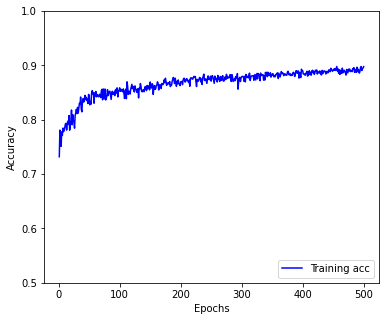

In [59]:
plt.figure(figsize=(6,5))
plt.plot(epochs, acc, label='Training acc', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [60]:
pred_test = model.predict_classes(dataX_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [61]:
test_loss, test_acc = model.evaluate(dataX_test, Y_test)

87/87 [==============================] - 0s 3ms/step - loss: 0.7402 - accuracy: 0.8703


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_test)
print(cm)

[[2055  187]
 [ 171  348]]


In [63]:
Y_test.value_counts()

0    2242
1     519
Name: Target, dtype: int64